## Calculate daily insolation 2
Upload solar and ClimateUtilities

In [1]:
from solar import *
from ClimateUtilities import *
import numpy as np

In [49]:
# Make a latitude array
lat=np.arange(-90,92,2)
nlat=len(lat)

# Make the day array
yday=365  # number of days per year
day=np.arange(yday)+1.

So=1367.   # Solar constant (W/m**2)
obl=23.   # obliquity
e=0.02      # eccentricity


Calculate daily insolation with the precession values of 270 (June Perihelion) and 90 (December Perihelion) degrees.

In [50]:
pre270=270    # precession: June Perihelion
pre90=90    # precession: December Perihelion

# We need to add 90 degrees because the fluxmap module
# uses precession from summer solstice whereas the
# conventional value is measured from vernal equinox

pre270_in=pre270+90.
pre90_in=pre90+90.

(91, 365)


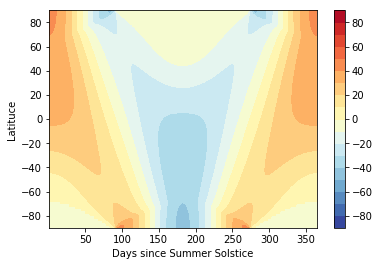

In [52]:
# Calculate the daily flux factor for each latitude
flux270=fluxmap(e,obl,pre270_in,lat,yday)
flux90=fluxmap(e,obl,pre90_in,lat,yday)

# print out the shape of the flux factor
print(flux270.shape)

# color map
cmap1=plt.cm.RdYlBu_r

# set contour levels
levels = np.arange(-90,100,10)

# Draw a contour plot of daily insolation (W/m2)
import matplotlib.pyplot as plt
cs=plt.contourf(day,lat,So*flux270-So*flux90, levels, cmap=cmap1)
plt.xlabel('Days since Summer Solstice')
plt.ylabel('Latituce')
plt.colorbar(cs)

Calculate line plots of daily insolation at 44S, equator, and 44N for the eccentricity values of 0.05 and precession values of 270.

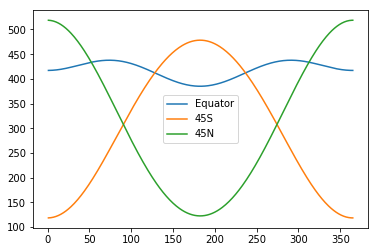

In [53]:
plt.plot(day,So*flux270[45,:],label='Equator')
plt.plot(day,So*flux270[22,:],label='45S')
plt.plot(day,So*flux270[67,:],label='45N')
plt.legend()

#### Exercise
Calculate line plots of daily insolation at 44S, equator, and 44N for the eccentricity values of 0.05 and precession values of 90.

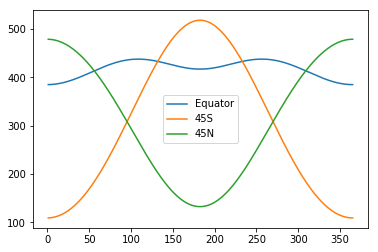

In [54]:
plt.plot(day,So*flux90[45,:],label='Equator')
plt.plot(day,So*flux90[22,:],label='45S')
plt.plot(day,So*flux90[67,:],label='45N')
plt.legend()

#### Exercise
Calculate line plots of daily insolation at 44S, equator, and 44N for the eccentricity values of 0.06 and precession values of 270. You need to calculate flux factors again.

###### Exercise
Calculate line plots of daily insolation at 44S, equator, and 44N for the eccentricity values of 0.06 and precession values of 90.

Evolution of Earth's Orbital parameters.
Write and plot eccentricity.

Upload milankovic and orbital_parameter_data.txt.

24.229 0.019971 293.86
(501,)


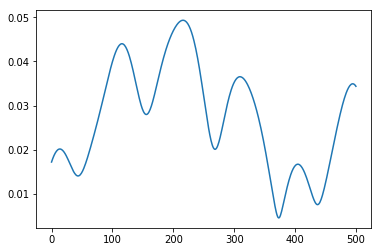

In [61]:
from milankovic import *
import numpy as np
import matplotlib.pyplot as plt

obl1,eccen1,prec1=orbital_parameter(10.) # time in kyr
print(obl1,eccen1,prec1)

ntime=501
time=np.arange(ntime)

obl,eccen,prec=orbital_parameter(time)
print(obl.shape)
plt.plot(time,eccen)

Plot obliquity

Plot precession

Plot insolation at 65N.

Text(0, 0.5, 'Insolation at 65N on June 21 (W/m2)')

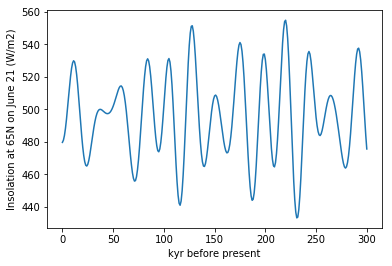

In [64]:
yday=365
So=1367; # solar constant (W/m**2)
#lats = np.arange(-90.,90.,2.)
lats = [65.]
nlat=np.size(lats)

ntime=301
time=np.arange(ntime)
flux=np.zeros((ntime,nlat,yday))

obl,eccen,pre=orbital_parameter(time)
# precession of the fluxmap module starts on summer solstice
pre_cal=pre+90.

for k in range(ntime):
  flux[k,:,:]=fluxmap(eccen[k],obl[k],pre_cal[k],lats,yday)

plt.plot(time,So*flux[:,0,0])  # day 0 is summer solstice
plt.xlabel('kyr before present')
plt.ylabel('Insolation at 65N on June 21 (W/m2)')
